# Desenfoque 

En esta ocasión, vamos a agregar el defecto de desenfoque. El lenguaje de programación python cuenta con la libreria PIL, la cual es toda una suit de herramientas para el procesamiento de imagenes. Esta libreria a su vez, cuenta con 3 diferentes procesos de desenfoque, los cuales son: 

- Desenfoque gaussiano
- Desenfoque de caja
- Desenfoque medio 

A cada imagen de este conjunto, le agregaremos uno de los 3 tipos de desenfoques. Primero mostraremos como es el efecto que tiene cada uno de ellos sobre la misma imagen

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import random
import matplotlib.pyplot as plt


CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('data')

Cargamos nuestra fila de imagenes y definimos el tamaño de la imagen que queremos visualizar

In [2]:
files = sorted([f for f in DATA_DIR.joinpath('Process','Red','desenfoque').iterdir() if f.is_file()])
ancho_pulgadas = 10
alto_pulgadas = 8

## Imagen orignal

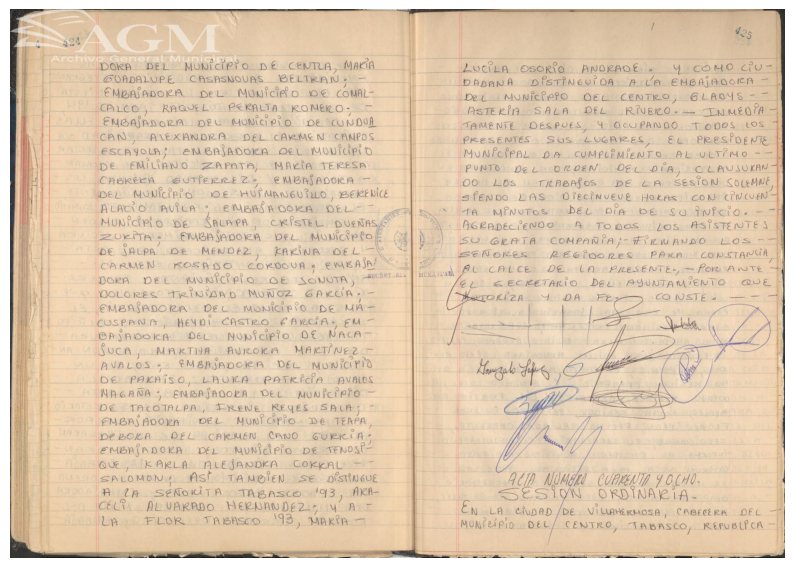

In [3]:
from PIL import Image, ImageFilter

# Cargar la imagen

imagen = Image.open(str(files[0]))
fig = plt.gcf()
fig.set_size_inches(ancho_pulgadas, alto_pulgadas)
dpi = 400
plt.axis('off')
plt.gca().set_rasterized(True)
#######################################################
plt.imshow(imagen)
plt.show()

## Desenfoque gaussiano

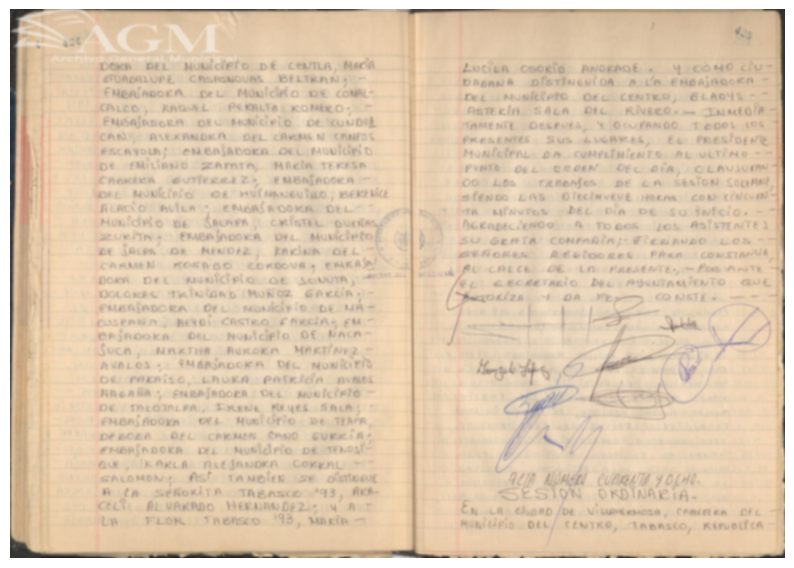

In [4]:
# Aplicar desenfoque gaussiano a la imagen
imagen_desenfocada = imagen.filter(ImageFilter.GaussianBlur(radius=2))
fig = plt.gcf()
fig.set_size_inches(ancho_pulgadas, alto_pulgadas)
dpi = 400
plt.axis('off')
plt.gca().set_rasterized(True)
#######################################################
plt.imshow(imagen_desenfocada)
plt.show()

## Desenfoque de caja

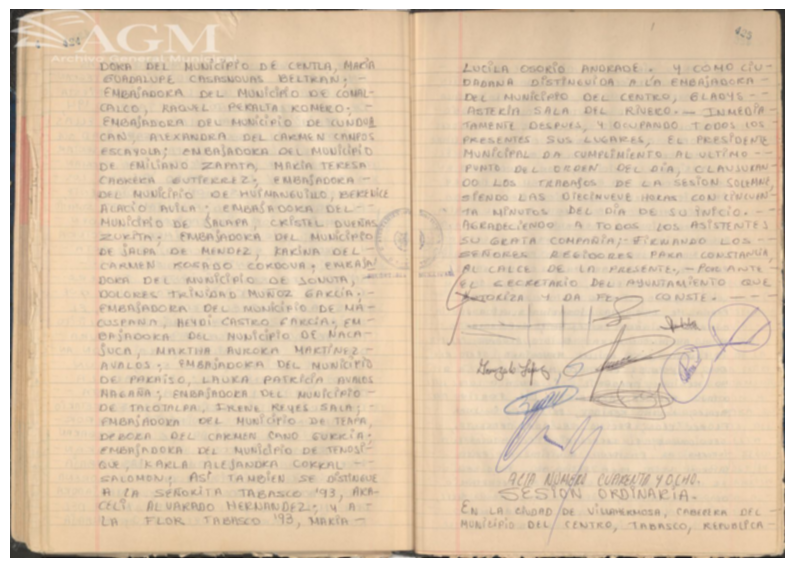

In [5]:

# Aplicar desenfoque de caja a la imagen
imagen_desenfocada_caja = imagen.filter(ImageFilter.BoxBlur(radius=2))
# Aplicar desenfoque gaussiano a la imagen
fig = plt.gcf()
fig.set_size_inches(ancho_pulgadas, alto_pulgadas)
dpi = 400
plt.axis('off')
plt.gca().set_rasterized(True)
#######################################################
plt.imshow(imagen_desenfocada_caja)
plt.show()

## Desenfoque medio

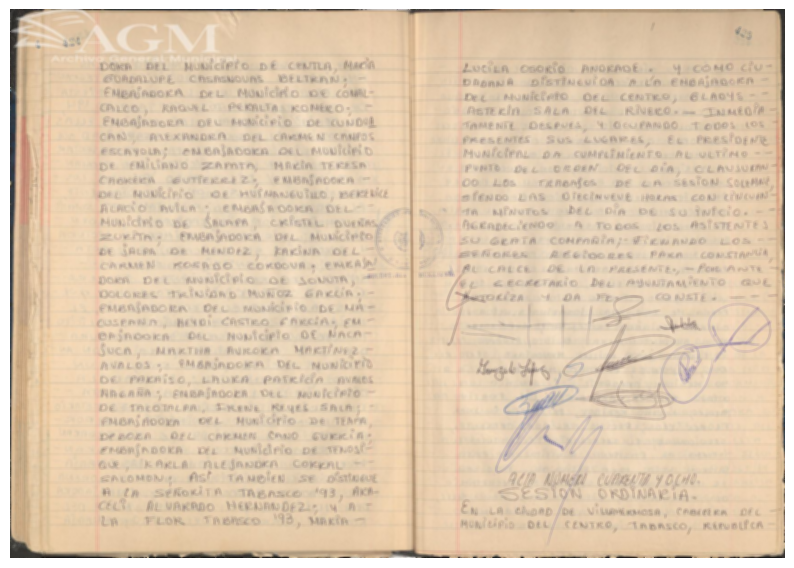

In [6]:
# Aplicar desenfoque medio a la imagen
imagen_desenfocada_medio = imagen.filter(ImageFilter.BLUR)
fig = plt.gcf()
fig.set_size_inches(ancho_pulgadas, alto_pulgadas)
dpi = 400
plt.axis('off')
plt.gca().set_rasterized(True)
#######################################################
plt.imshow(imagen_desenfocada_medio)
plt.show()

-----

## Generación a todo el conjunto de imagenes

A continuación, agregaremos el desenfoque a todo el conjunto de imagenes. ¿Cúal es la razón de agregar los 3 tipos y no solo uno? Si agregamos solo un tipo de desenfoque corremos el riesgo de que al final, la red neuronal aprenda a corregir un tipo de desenfoque y no el problema del desenfoque en general, y recordemos que queremos hacer nuestro modelo lo mas general posible

In [7]:
import desenfoque

In [8]:
for file in files:
    imagen = desenfoque.desenfoques(str(file))
    imagen.save(str(file))
    
print('Proceso completado con éxito')

Proceso completado con éxito
